<a href="https://colab.research.google.com/github/BelleBK/Health-lifestyle-weight-change/blob/main/Final_project_Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving weight_change_dataset.csv to weight_change_dataset.csv


{'weight_change_dataset.csv': b'Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)\r\n1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6\r\n2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8\r\n3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2\r\n4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3\r\n5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5\r\n6,56,F,152.9,2100.6,2262.4,161.9,-12.513498122979657,9,Sedentary,Poor,6,140.4\r\n7,36,M,107.3,1991.3,2933.4,942.1,-2.4373069574334685,2,Moderately Active,Poor,5,104.9\r\n8,40,M,207.9,2977.9,4000.0,1022.1,-35.67811526793611,11,Moderately Active,Poor,9,172.2\r\n9,28,F,169.5,2406.9,3890.2,1483.4,-8.476632983935861,10,Very Active,Poor,1,161.0\r\n10,28,F,169.2,2403.3,2485.8,82.5,0.0,2,Sedentary,Excel

In [ ]:
import pandas as pd

df = pd.read_csv("weight_change_dataset.csv")

df.head()


,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [ ]:
df[[
    'Age',
    'Current Weight (lbs)',
    'Daily Calories Consumed',
    'Daily Caloric Surplus/Deficit',
    'Weight Change (lbs)',
    'Duration (weeks)'
]].agg(['mean', 'median', 'std'])



,Age,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks)
mean,37.910000,171.533000,3518.292000,1000.091000,-2.779817,6.920000
median,38.000000,172.150000,3636.050000,1013.100000,0.100000,7.000000
std,12.219454,30.333856,513.313097,371.560827,7.443719,3.515277


##Histograms

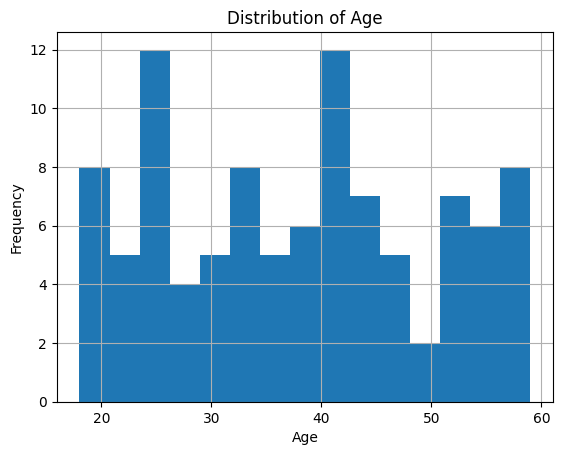

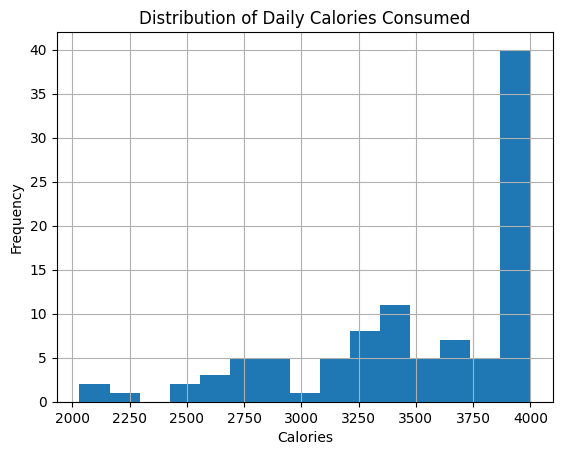

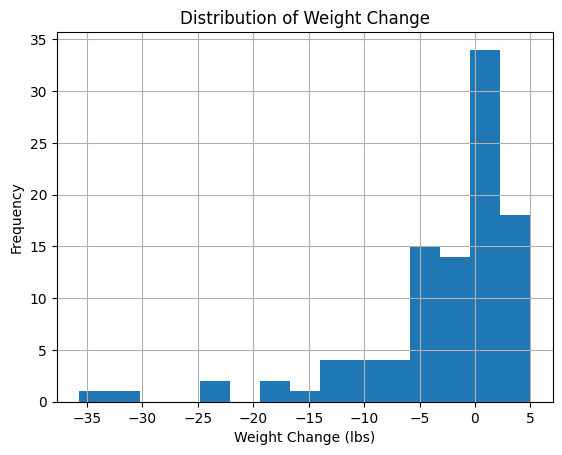

In [ ]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=15)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

df['Daily Calories Consumed'].hist(bins=15)
plt.title('Distribution of Daily Calories Consumed')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

df['Weight Change (lbs)'].hist(bins=15)
plt.title('Distribution of Weight Change')
plt.xlabel('Weight Change (lbs)')
plt.ylabel('Frequency')
plt.show()


The age distribution shows a wide range of participants, with most individuals falling within middle adulthood. Daily calorie intake displays noticeable variation, indicating different eating patterns. The distribution of weight change suggests that while many participants experienced small changes, some individuals showed larger weight gains or losses.

##Hypothesis Testing

##Hypothesis 1: Physical Activity Level and Weight Change

Research Statement

-Individuals with higher physical activity levels experience greater weight loss than those with lower activity levels.

-Statistical Test

One-Way ANOVA

Reason:

Weight Change → continuous

Physical Activity Level → categorical with more than two groups
(e.g., Sedentary, Lightly Active, Very Active)

In [ ]:
from scipy import stats

groups = [
    df[df['Physical Activity Level'] == level]['Weight Change (lbs)']
    for level in df['Physical Activity Level'].unique()
]

f_stat, p_value = stats.f_oneway(*groups)

f_stat, p_value


(np.float64(0.8083405428463495), np.float64(0.49227853331925653))

F-statistic = 0.8083

p-value = 0.4923

The one-way ANOVA test produced an F-statistic of 0.81 and a p-value of 0.49. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This result indicates that there is no statistically significant difference in mean weight change across different physical activity levels in this dataset.

##Hypothesis 2: Daily Calorie Intake and Weight Change

Reason:

Both variables are continuous

Measures linear relationship

In [ ]:
corr, p_value = stats.pearsonr(
    df['Daily Calories Consumed'],
    df['Weight Change (lbs)']
)

corr, p_value


(np.float64(-0.05811022450935918), np.float64(0.5657770108885941))

Decision Rule

Significance level (α) = 0.05

Since p-value = 0.5658 > 0.05, we fail to reject the null hypothesis.

The Pearson correlation analysis yielded a correlation coefficient of −0.06 with a p-value of 0.57. Because the p-value exceeds the 0.05 significance level, the null hypothesis is not rejected. This indicates that there is no statistically significant relationship between daily calorie intake and weight change in this dataset. The correlation coefficient is very close to zero, suggesting a very weak relationship between the two variables.

##Hypothesis 3: Sleep Quality and Weight Change
Research Statement

Sleep quality has an effect on weight change.

Statistical Test

One-Way ANOVA

Reason:

Weight Change → continuous

Sleep Quality → categorical (e.g., Poor, Fair, Good, Excellent)

In [ ]:
sleep_groups = [
    df[df['Sleep Quality'] == level]['Weight Change (lbs)']
    for level in df['Sleep Quality'].unique()
]

f_stat, p_value = stats.f_oneway(*sleep_groups)

f_stat, p_value


(np.float64(19.73331818899147), np.float64(4.790721871604607e-10))

F-statistic = 19.73

p-value = 4.79 × 10⁻¹⁰ (that’s 0.000000000479, extremely small)

The one-way ANOVA test produced an F-statistic of 19.73 with a p-value of 4.79 × 10⁻¹⁰. Since the p-value is far below the 0.05 significance level, the null hypothesis is rejected. This result indicates a statistically significant difference in mean weight change across different sleep quality levels. Therefore, sleep quality appears to have a significant impact on weight change in this dataset.

#1. Pearson Correlation: Age and Weight Change
Purpose

To examine whether there is a linear relationship between age and weight change.

Variables

Age (continuous)

Weight Change (lbs) (continuous)

Test Used

Pearson correlation

In [ ]:
from scipy import stats

r, p_value = stats.pearsonr(df['Age'], df['Weight Change (lbs)'])
r, p_value


(np.float64(0.06272065072009358), np.float64(0.535302700736665))

Result:

r = 0.063

p-value = 0.535

Interpretation

The Pearson correlation coefficient indicates a very weak positive relationship between age and weight change. Since the p-value is greater than 0.05, this relationship is not statistically significant. This suggests that age is not meaningfully associated with weight change in this dataset.

#2. Spearman Correlation: Physical Activity Level and Sleep Quality
Purpose

To examine whether higher-ranked physical activity levels are associated with better sleep quality.

Variables

Physical Activity Level (ordinal categorical)

Sleep Quality (ordinal categorical)

Preparation

Convert categories into numeric ranks.

In [ ]:
activity_map = {
    'Sedentary': 1,
    'Lightly Active': 2,
    'Moderately Active': 3,
    'Very Active': 4
}

sleep_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

df['Activity Rank'] = df['Physical Activity Level'].map(activity_map)
df['Sleep Rank'] = df['Sleep Quality'].map(sleep_map)

rho, p_value = stats.spearmanr(df['Activity Rank'], df['Sleep Rank'])
rho, p_value


(np.float64(-0.1665014502145995), np.float64(0.09779072965448696))

Result:

ρ = −0.167

p-value = 0.098

Interpretation

The Spearman correlation shows a weak negative relationship between physical activity level and sleep quality. However, the p-value is greater than 0.05, indicating that the relationship is not statistically significant. Therefore, no clear monotonic relationship between activity level and sleep quality is observed.

#3. Point-Biserial Correlation: Caloric Balance and Weight Change
Purpose

To examine whether caloric status (surplus vs deficit) is related to weight change.

Variables

Caloric Status (binary: surplus or deficit)

Weight Change (lbs) (continuous)

In [ ]:
df['Caloric Status'] = df['Daily Caloric Surplus/Deficit'].apply(
    lambda x: 1 if x > 0 else 0
)


In [ ]:
r_pb, p_value = stats.pointbiserialr(
    df['Caloric Status'],
    df['Weight Change (lbs)']
)

r_pb, p_value


/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:5534: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


(np.float64(nan), np.float64(nan))

r = NaN

p-value = NaN

Interpretation

The point-biserial correlation could not be computed because one of the variables lacked sufficient variation (e.g., nearly all participants were in the same caloric category). As a result, no valid statistical conclusion can be drawn from this test.

#4. Phi Coefficient: Physical Activity and Sleep Quality (Binary)
Purpose

To examine the association between being physically active and good sleep quality.

Variables

Physically Active (yes/no)

Good Sleep Quality (yes/no)

In [ ]:
df['Active Binary'] = df['Activity Rank'].apply(lambda x: 1 if x >= 3 else 0)
df['Good Sleep Binary'] = df['Sleep Rank'].apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

table = pd.crosstab(df['Active Binary'], df['Good Sleep Binary'])
chi2, p, _, _ = chi2_contingency(table)

phi = np.sqrt(chi2 / df.shape[0])
phi, p


(np.float64(0.19546473187729307), np.float64(0.05062471211340672))

Result:

φ = 0.195

p-value = 0.051

Interpretation

The Phi coefficient indicates a weak positive association between being physically active and having good sleep quality. The p-value is slightly above the 0.05 significance level, meaning the relationship is not statistically significant, although it is close to significance. This suggests a possible trend that may become significant with a larger sample size.

#5. Kendall’s Tau: Sleep Duration (Duration Weeks) and Weight Change
Purpose

To examine a monotonic relationship between duration of behavior and weight change.

Variables

Duration (weeks) (ordinal/continuous)

Weight Change (lbs) (continuous)

In [ ]:
tau, p_value = stats.kendalltau(
    df['Duration (weeks)'],
    df['Weight Change (lbs)']
)

tau, p_value


(np.float64(0.10710480342730816), np.float64(0.13045830250286605))

Result:

τ = 0.107

p-value = 0.130

Interpretation

Kendall’s Tau shows a weak positive monotonic relationship between duration and weight change. Since the p-value is greater than 0.05, the relationship is not statistically significant. This suggests that longer duration alone does not consistently lead to greater weight change in this dataset.

#6. Correlation Heatmap
Purpose

To visualize multiple correlations at once.

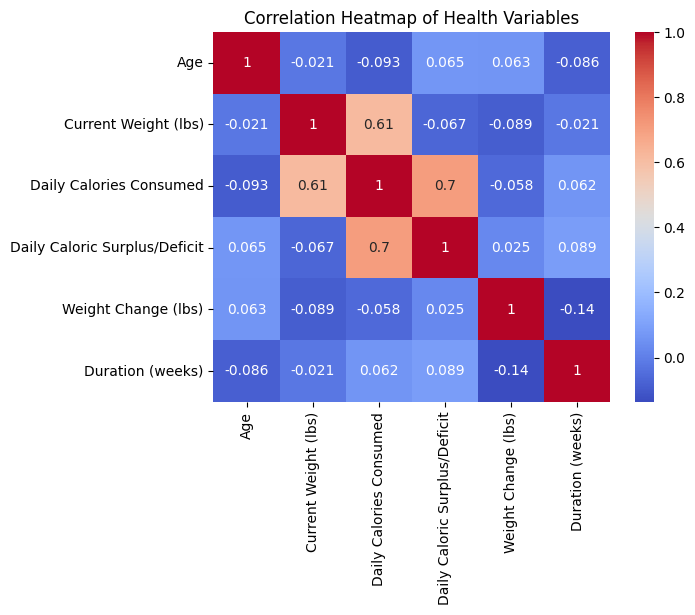

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[[
    'Age',
    'Current Weight (lbs)',
    'Daily Calories Consumed',
    'Daily Caloric Surplus/Deficit',
    'Weight Change (lbs)',
    'Duration (weeks)'
]].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Health Variables')
plt.show()


#Overall Correlation Summary

Overall, the correlation analysis shows that most relationships between health and lifestyle variables and weight change are weak and not statistically significant. However, sleep quality demonstrated a strong effect in the hypothesis testing stage, highlighting its potential importance compared to other lifestyle factors. These findings suggest that weight change is influenced by multiple interacting factors rather than a single variable.